<a href="https://colab.research.google.com/github/vishmaria/Estatistica-com-Python/blob/main/A1_estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A necessidade de se instalar o pandas depende do ambiente que você está programando
!pip install pandas

In [ ]:
# Importando o pacote pandas
import pandas as pd

In [ ]:
# Criando uma Series
pd.Series(['a','b','c','d'])

0    a
1    b
2    c
3    d
dtype: object

In [ ]:
# Criando duas Series s1 e s2
s1 = pd.Series(['a','b','c','d'], name='Series1')
s2 = pd.Series(['e','f','g','h'], name='Series2')
print(s1)
print(s2)

0    a
1    b
2    c
3    d
Name: Series1, dtype: object
0    e
1    f
2    g
3    h
Name: Series2, dtype: object


In [ ]:
# Transformando as series em um dataframe
pd.DataFrame([s1,s2])

,0,1,2,3
Series1,a,b,c,d
Series2,e,f,g,h


In [ ]:
# Criando um dicionário: conjunto de pares de chave e valor
dados = {'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantins', 'Bahia','Minas Gerais'],
         'Ano': [2004, 2005, 2006, 2007, 2008],
        'Taxa de Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}
print(dados)

{'Estado': ['Santa Catarina', 'Rio de Janeiro', 'Tocantins', 'Bahia', 'Minas Gerais'], 'Ano': [2004, 2005, 2006, 2007, 2008], 'Taxa de Desemprego': [1.5, 1.7, 1.6, 2.4, 2.7]}


In [ ]:
df = pd.DataFrame(dados)
df

,Estado,Ano,Taxa de Desemprego
0,Santa Catarina,2004,1.5
1,Rio de Janeiro,2005,1.7
2,Tocantins,2006,1.6
3,Bahia,2007,2.4
4,Minas Gerais,2008,2.7


# Descrevendo/Conhecendo seu dataset


In [ ]:
df = pd.read_csv('/content/HIST_PAINEL_COVIDBR_2020.csv',sep = ';')
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125.0,2,1,0,0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714476,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,27/07/2020,31,3015268.0,98480,2148,1339,31,NaN,NaN,1.0
714477,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,28/07/2020,31,3015268.0,100726,2246,1391,52,NaN,NaN,1.0
714478,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,29/07/2020,31,3015268.0,102342,1616,1419,28,NaN,NaN,1.0
714479,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,30/07/2020,31,3015268.0,104442,2100,1444,25,NaN,NaN,1.0


In [ ]:
df.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,714481.000000,710057.000000,707390.000000,714481.000000,7.118140e+05,7.144810e+05,714481.000000,714481.000000,714481.000000,1.580000e+02,158.000000,707390.000000
mean,32.358471,325258.014130,32403.123698,22.269757,1.307858e+05,4.190627e+02,11.179381,18.050473,0.388289,3.644498e+05,240045.278481,0.069300
std,9.881804,98535.093585,9836.348259,5.256750,3.269948e+06,1.567303e+04,379.852067,643.339630,12.201454,5.168993e+05,258402.574565,0.253963
min,11.000000,110000.000000,11001.000000,9.000000,7.810000e+02,0.000000e+00,-1812.000000,0.000000,-238.000000,0.000000e+00,0.000000,0.000000
25%,25.000000,251200.000000,25010.000000,18.000000,5.476000e+03,0.000000e+00,0.000000,0.000000,0.000000,1.255500e+03,8710.750000,0.000000
50%,31.000000,314610.000000,31059.000000,22.000000,1.171100e+04,3.000000e+00,0.000000,0.000000,0.000000,7.895150e+04,103424.000000,0.000000
75%,41.000000,411915.000000,41015.000000,27.000000,2.588100e+04,3.100000e+01,1.000000,1.000000,0.000000,5.660832e+05,484557.250000,0.000000
max,76.000000,530010.000000,53001.000000,31.000000,2.101471e+08,2.662485e+06,69074.000000,92475.000000,1595.000000,1.844051e+06,725959.000000,1.000000


In [ ]:
df.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125.0,2,1,0,0,1.0,1.0,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,01/03/2020,10,210147125.0,2,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,02/03/2020,10,210147125.0,2,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,03/03/2020,10,210147125.0,2,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,04/03/2020,10,210147125.0,3,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,05/03/2020,10,210147125.0,7,4,0,0,4.0,3.0,NaN


In [ ]:
df.tail(15)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
714466,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,17/07/2020,29,3015268.0,79400,1779,1060,23,NaN,NaN,1.0
714467,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,18/07/2020,29,3015268.0,81163,1763,1075,15,NaN,NaN,1.0
714468,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,19/07/2020,30,3015268.0,82412,1249,1085,10,NaN,NaN,1.0
714469,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,20/07/2020,30,3015268.0,84287,1875,1112,27,NaN,NaN,1.0
714470,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,21/07/2020,30,3015268.0,86076,1789,1158,46,NaN,NaN,1.0
714471,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,22/07/2020,30,3015268.0,87801,1725,1176,18,NaN,NaN,1.0
714472,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,23/07/2020,30,3015268.0,90023,2222,1218,42,NaN,NaN,1.0
714473,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,24/07/2020,30,3015268.0,92414,2391,1244,26,NaN,NaN,1.0
714474,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,25/07/2020,30,3015268.0,94187,1773,1275,31,NaN,NaN,1.0
714475,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,26/07/2020,31,3015268.0,96332,2145,1308,33,NaN,NaN,1.0


In [ ]:
df.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado              int64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

In [ ]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

# Selecionando Dados

In [ ]:
# Selecionando as linhas do índice 0 ao 2, o último índice é exclusivo, ou seja, a linha do índice 3 não é mostrada
df[0:3]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,25/02/2020,9,210147125.0,0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125.0,1,0,0,0,1.0,0.0,NaN


In [ ]:
# Selecionando as linhas do índice 5 ao 9
df[5:10]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,01/03/2020,10,210147125.0,2,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,02/03/2020,10,210147125.0,2,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,03/03/2020,10,210147125.0,2,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,04/03/2020,10,210147125.0,3,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,05/03/2020,10,210147125.0,7,4,0,0,4.0,3.0,NaN


In [ ]:
# Selecionando uma coluna
df['regiao']

0               Brasil
1               Brasil
2               Brasil
3               Brasil
4               Brasil
              ...     
714476    Centro-Oeste
714477    Centro-Oeste
714478    Centro-Oeste
714479    Centro-Oeste
714480    Centro-Oeste
Name: regiao, Length: 714481, dtype: object

In [ ]:
# Selecionando mais de uma coluna
df[['regiao','casosNovos']]

,regiao,casosNovos
0,Brasil,0
1,Brasil,1
2,Brasil,0
3,Brasil,0
4,Brasil,1
...,...,...
714476,Centro-Oeste,2148
714477,Centro-Oeste,2246
714478,Centro-Oeste,1616
714479,Centro-Oeste,2100


In [ ]:
# Selecionando todas as linhas e as colunas estado e municipio
df.loc[:,['estado',"municipio"]]

,estado,municipio
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN
14,NaN,NaN
15,NaN,NaN
16,NaN,NaN
17,NaN,NaN
18,NaN,NaN
19,NaN,NaN


In [ ]:
# Selecionando as linhas dos índices 1 a 9 e todas as colunas
df.iloc[1:10]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,26/02/2020,9,210147125.0,1,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,27/02/2020,9,210147125.0,1,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,28/02/2020,9,210147125.0,1,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,29/02/2020,9,210147125.0,2,1,0,0,1.0,1.0,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,01/03/2020,10,210147125.0,2,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,02/03/2020,10,210147125.0,2,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,03/03/2020,10,210147125.0,2,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,04/03/2020,10,210147125.0,3,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,05/03/2020,10,210147125.0,7,4,0,0,4.0,3.0,NaN


In [ ]:
#selecionando todas as linhas e algumas colunas pelas suas posições de 3 ao 10 (exclusivo)
df.iloc[:,3:10]

,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019
0,76,NaN,NaN,NaN,25/02/2020,9,210147125.0
1,76,NaN,NaN,NaN,26/02/2020,9,210147125.0
2,76,NaN,NaN,NaN,27/02/2020,9,210147125.0
3,76,NaN,NaN,NaN,28/02/2020,9,210147125.0
4,76,NaN,NaN,NaN,29/02/2020,9,210147125.0
...,...,...,...,...,...,...,...
714476,53,530010.0,53001.0,DISTRITO FEDERAL,27/07/2020,31,3015268.0
714477,53,530010.0,53001.0,DISTRITO FEDERAL,28/07/2020,31,3015268.0
714478,53,530010.0,53001.0,DISTRITO FEDERAL,29/07/2020,31,3015268.0
714479,53,530010.0,53001.0,DISTRITO FEDERAL,30/07/2020,31,3015268.0


In [ ]:
# Selecionando somente as linhas em que não há Nan para o municipio
df[df.municipio.isnull()==False]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
4551,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,27/03/2020,13,22945.0,0,0,0,0,NaN,NaN,0.0
4552,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,28/03/2020,13,22945.0,0,0,0,0,NaN,NaN,0.0
4553,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,29/03/2020,14,22945.0,0,0,0,0,NaN,NaN,0.0
4554,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,30/03/2020,14,22945.0,0,0,0,0,NaN,NaN,0.0
4555,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,31/03/2020,14,22945.0,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714476,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,27/07/2020,31,3015268.0,98480,2148,1339,31,NaN,NaN,1.0
714477,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,28/07/2020,31,3015268.0,100726,2246,1391,52,NaN,NaN,1.0
714478,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,29/07/2020,31,3015268.0,102342,1616,1419,28,NaN,NaN,1.0
714479,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,30/07/2020,31,3015268.0,104442,2100,1444,25,NaN,NaN,1.0


# Indexação Booleana

In [ ]:
# Seleciona as linhas quando o codigo da uf é maior que 22 e menor que 51 (caso verdadeiro)
df[(df['coduf'] > 22) & (df['coduf'] < 51)]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1580,Nordeste,CE,NaN,23,NaN,NaN,NaN,25/02/2020,9,9132078.0,0,0,0,0,NaN,NaN,NaN
1581,Nordeste,CE,NaN,23,NaN,NaN,NaN,26/02/2020,9,9132078.0,0,0,0,0,NaN,NaN,NaN
1582,Nordeste,CE,NaN,23,NaN,NaN,NaN,27/02/2020,9,9132078.0,0,0,0,0,NaN,NaN,NaN
1583,Nordeste,CE,NaN,23,NaN,NaN,NaN,28/02/2020,9,9132078.0,0,0,0,0,NaN,NaN,NaN
1584,Nordeste,CE,NaN,23,NaN,NaN,NaN,29/02/2020,9,9132078.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664946,Centro-Oeste,MS,Vicentina,50,500840.0,50003.0,DOURADOS,27/07/2020,31,6102.0,87,0,2,0,NaN,NaN,0.0
664947,Centro-Oeste,MS,Vicentina,50,500840.0,50003.0,DOURADOS,28/07/2020,31,6102.0,87,0,2,0,NaN,NaN,0.0
664948,Centro-Oeste,MS,Vicentina,50,500840.0,50003.0,DOURADOS,29/07/2020,31,6102.0,89,2,2,0,NaN,NaN,0.0
664949,Centro-Oeste,MS,Vicentina,50,500840.0,50003.0,DOURADOS,30/07/2020,31,6102.0,89,0,2,0,NaN,NaN,0.0


In [ ]:
# Selecionando as linhas das regiões Nordeste ou Sudeste
df[(df['regiao'] == "Nordeste") | (df['regiao'] == "Sudeste")]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1264,Nordeste,MA,NaN,21,NaN,NaN,NaN,25/02/2020,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1265,Nordeste,MA,NaN,21,NaN,NaN,NaN,26/02/2020,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1266,Nordeste,MA,NaN,21,NaN,NaN,NaN,27/02/2020,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1267,Nordeste,MA,NaN,21,NaN,NaN,NaN,28/02/2020,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1268,Nordeste,MA,NaN,21,NaN,NaN,NaN,29/02/2020,9,7075181.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503275,Sudeste,SP,Estiva Gerbi,35,355730.0,35141.0,BAIXA MOGIANA,27/07/2020,31,11304.0,100,0,4,0,NaN,NaN,0.0
503276,Sudeste,SP,Estiva Gerbi,35,355730.0,35141.0,BAIXA MOGIANA,28/07/2020,31,11304.0,100,0,4,0,NaN,NaN,0.0
503277,Sudeste,SP,Estiva Gerbi,35,355730.0,35141.0,BAIXA MOGIANA,29/07/2020,31,11304.0,105,5,4,0,NaN,NaN,0.0
503278,Sudeste,SP,Estiva Gerbi,35,355730.0,35141.0,BAIXA MOGIANA,30/07/2020,31,11304.0,107,2,4,0,NaN,NaN,0.0


# Operações

In [ ]:
# Quantidade de entradas por estado
dados = df['estado'].value_counts()
pd.DataFrame(dados)

#Ex: DataFrame de vendas em que cada linha é uma venda
# dados = df['vendedor'].value_counts()

,estado
MG,108616
SP,82200
RS,63404
BA,53244
PR,50958
SC,37750
GO,31527
PI,28733
PB,28606
MA,27844


In [ ]:
# Media de casos por região
df[['casosNovos','regiao']].groupby(['regiao']).mean()

,casosNovos
regiao,
Brasil,16851.170886
Centro-Oeste,8.340693
Nordeste,7.454998
Norte,13.900779
Sudeste,8.622540
Sul,2.983026


In [ ]:
df[['casosNovos','regiao']].groupby(['regiao']).sum()

,casosNovos
regiao,
Brasil,2662485
Centro-Oeste,502068
Nordeste,1717654
Norte,815100
Sudeste,1836394
Sul,453754


In [ ]:
df1 = df[['regiao','casosNovos','estado']].groupby(['regiao','estado']).agg(['mean', 'std','count','median']) # agg = aggregation

# Agregação

In [ ]:
# Concatenação (empilhando os dados)
df1 = pd.DataFrame(
    {
      "Luciano": ["A0", "A1", "A2", "A3"],
      "Maria": ["B0", "B1", "B2", "B3"],
      "Benjamim": ["C0", "C1", "C2", "C3"],
      "Celle": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
    {
      "Luciano": ["A4", "A5", "A6", "A7"],
      "Maria": ["B4", "B5", "B6", "B7"],
      "Benjamim": ["C4", "C5", "C6", "C7"],
      "Celle": ["D4", "D5", "D6", "D7"],
   },
    index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
    {
      "Luciano": ["A8", "A9", "A10", "A11"],
      "Maria": ["B8", "B9", "B10", "B11"],
      "Benjamim": ["C8", "C9", "C10", "C11"],
      "Celle": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11]
)
# frames = [df1, df2, df3]
# result = pd.concat(frames)
# result
result1 = pd.concat([df1, df2,df3])
result1

,Luciano,Maria,Benjamim,Celle
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [ ]:
#Merge - guenta um pouco mais que ja vamos ver!
# Conceito de chave, possuo dois conjuntos de dados e eles compartilham uma coluna, que nesse caso é o código de município, por exemplo.

# Tratando os dados na prática

In [ ]:
# Carregando os dados da tabela município
munic = pd.read_csv('/content/municipios.csv')
munic

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31
2,5200100,Abadiânia,-16.19700,-48.7057,0,52
3,3100203,Abaeté,-19.15510,-45.4444,0,31
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15
...,...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,0,29
5566,2517407,Zabelê,-8.07901,-37.1057,0,25
5567,3557154,Zacarias,-21.05060,-50.0552,0,35
5568,2114007,Zé Doca,-3.27014,-45.6553,0,21


In [ ]:
# axis = 0 - linha que quero excluir, axis = 1 quero excluir as colunas
df = df.drop(['municipio','codmun','codRegiaoSaude','nomeRegiaoSaude','semanaEpi','interior/metropolitana', 'emAcompanhamentoNovos'], axis = 1)

KeyError: ignored

In [ ]:
df

,regiao,estado,coduf,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos
0,Brasil,NaN,76,25/02/2020,210147125.0,0,0,0,0,0.0
1,Brasil,NaN,76,26/02/2020,210147125.0,1,1,0,0,1.0
2,Brasil,NaN,76,27/02/2020,210147125.0,1,0,0,0,1.0
3,Brasil,NaN,76,28/02/2020,210147125.0,1,0,0,0,0.0
4,Brasil,NaN,76,29/02/2020,210147125.0,2,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
714476,Centro-Oeste,DF,53,27/07/2020,3015268.0,98480,2148,1339,31,NaN
714477,Centro-Oeste,DF,53,28/07/2020,3015268.0,100726,2246,1391,52,NaN
714478,Centro-Oeste,DF,53,29/07/2020,3015268.0,102342,1616,1419,28,NaN
714479,Centro-Oeste,DF,53,30/07/2020,3015268.0,104442,2100,1444,25,NaN


In [ ]:
# Conferindo se existe null values na coluna estado
df.estado.isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
714476    False
714477    False
714478    False
714479    False
714480    False
Name: estado, Length: 714481, dtype: bool

In [ ]:
df_covid = df[(df['estado'] == 'DF') | (df['estado'] == 'RR') | (df['estado'] == 'AP') | (df['estado'] == 'AC') & (df.estado.isnull() == False)]
df_covid

,regiao,estado,coduf,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos
316,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN
317,Norte,AC,12,26/02/2020,881935.0,0,0,0,0,NaN
318,Norte,AC,12,27/02/2020,881935.0,0,0,0,0,NaN
319,Norte,AC,12,28/02/2020,881935.0,0,0,0,0,NaN
320,Norte,AC,12,29/02/2020,881935.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
714476,Centro-Oeste,DF,53,27/07/2020,3015268.0,98480,2148,1339,31,NaN
714477,Centro-Oeste,DF,53,28/07/2020,3015268.0,100726,2246,1391,52,NaN
714478,Centro-Oeste,DF,53,29/07/2020,3015268.0,102342,1616,1419,28,NaN
714479,Centro-Oeste,DF,53,30/07/2020,3015268.0,104442,2100,1444,25,NaN


In [ ]:
df_covid = pd.merge(df_covid,munic, left_on= 'coduf', right_on= 'codigo_uf')
df_covid

,regiao,estado,coduf,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200013,Acrelândia,-9.82581,-66.8972,0,12
1,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200054,Assis Brasil,-10.92980,-69.5738,0,12
2,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200104,Brasiléia,-10.99500,-68.7497,0,12
3,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200138,Bujari,-9.81528,-67.9550,0,12
4,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200179,Capixaba,-10.56600,-67.6860,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133114,Centro-Oeste,DF,53,27/07/2020,3015268.0,98480,2148,1339,31,NaN,5300108,Brasília,-15.77950,-47.9297,1,53
133115,Centro-Oeste,DF,53,28/07/2020,3015268.0,100726,2246,1391,52,NaN,5300108,Brasília,-15.77950,-47.9297,1,53
133116,Centro-Oeste,DF,53,29/07/2020,3015268.0,102342,1616,1419,28,NaN,5300108,Brasília,-15.77950,-47.9297,1,53
133117,Centro-Oeste,DF,53,30/07/2020,3015268.0,104442,2100,1444,25,NaN,5300108,Brasília,-15.77950,-47.9297,1,53


In [ ]:
# Renomeando as colunas do dataframe
df_covid.rename(columns = {'populacaoTCU2019': 'populacao', 'casosAcumulado': 'casos_acumulados', 'casosNovos': 'casos_novos', 'obitosAcumulado': 'obitos_acumulados','obitosNovos': 'obitos_novos','Recuperadosnovos':'recuperados novos'}, inplace = True)


In [ ]:
df_covid

,regiao,estado,coduf,data,populacao,casos_acumulados,casos_novos,obitos_acumulados,obitos_novos,recuperados novos,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200013,Acrelândia,-9.82581,-66.8972,0,12
1,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200054,Assis Brasil,-10.92980,-69.5738,0,12
2,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200104,Brasiléia,-10.99500,-68.7497,0,12
3,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200138,Bujari,-9.81528,-67.9550,0,12
4,Norte,AC,12,25/02/2020,881935.0,0,0,0,0,NaN,1200179,Capixaba,-10.56600,-67.6860,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133114,Centro-Oeste,DF,53,27/07/2020,3015268.0,98480,2148,1339,31,NaN,5300108,Brasília,-15.77950,-47.9297,1,53
133115,Centro-Oeste,DF,53,28/07/2020,3015268.0,100726,2246,1391,52,NaN,5300108,Brasília,-15.77950,-47.9297,1,53
133116,Centro-Oeste,DF,53,29/07/2020,3015268.0,102342,1616,1419,28,NaN,5300108,Brasília,-15.77950,-47.9297,1,53
133117,Centro-Oeste,DF,53,30/07/2020,3015268.0,104442,2100,1444,25,NaN,5300108,Brasília,-15.77950,-47.9297,1,53


In [ ]:
# Media de casos por estado
df_covid[['casos_novos','estado']].groupby(['estado']).mean()

,casos_novos
estado,
AC,13.296070
AP,33.304110
DF,745.908772
RR,29.238356


In [ ]:
df_covid[['casos_novos','data']].groupby(['data']).sum()

,casos_novos
data,
01/03/2020,0
01/04/2020,302
01/05/2020,7630
01/06/2020,21924
01/07/2020,52524
...,...
30/06/2020,22110
30/07/2020,36646
31/03/2020,104


In [ ]:
df_covid[['casos_acumulados','obitos_acumulados','data']].groupby(['data']).sum()

,casos_acumulados,obitos_acumulados
data,,
01/03/2020,0,0
01/04/2020,3614,6
01/05/2020,78248,2320
01/06/2020,726604,18202
01/07/2020,2085066,40380
...,...,...
30/06/2020,2032542,39068
30/07/2020,3174450,58794
31/03/2020,3312,6


In [ ]:
casos_estado = df_covid[['casos_acumulados','obitos_acumulados','estado']].groupby(['estado']).sum()
casos_estado

,casos_acumulados,obitos_acumulados
estado,,
AC,39867652,1059806
AP,55383616,936896
DF,6776068,90188
RR,31543020,627630


In [ ]:
casos_estado['casos - obitos'] = casos_estado['casos_acumulados'] - casos_estado['obitos_acumulados']
casos_estado['casos - obitos (%)'] = casos_estado['obitos_acumulados']/casos_estado['casos_acumulados']
casos_estado

,casos_acumulados,obitos_acumulados,casos - obitos,casos - obitos (%)
estado,,,,
AC,39867652,1059806,38807846,0.026583
AP,55383616,936896,54446720,0.016916
DF,6776068,90188,6685880,0.013310
RR,31543020,627630,30915390,0.019898


In [ ]:
# Exportar csv
casos_estado.to_csv("casos_por_estado.csv")

# Gráficos

<Axes: xlabel='estado'>

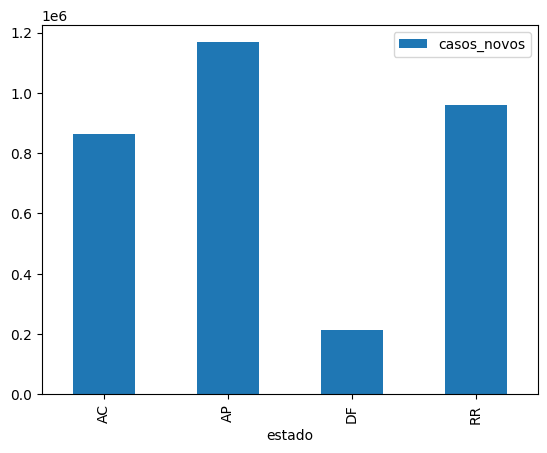

In [ ]:
df_covid[['casos_novos','estado']].groupby(['estado']).sum().plot(kind='bar')